# Project 2: Ames Housing Data Sale Price Prediction (3)

## Processes covered in this notebook

1. [Importing Data](#Importing-Data)
2. [Initial Scaling with all features (for RFE)](#Initial-Scaling-with-all-features-(for-RFE))
3. [Feature Selection through Wrapper Method RFECV on remaining features](#Feature-Selection-through-Wrapper-Method-RFECV-on-remaining-features)
4. [Extracting right features from the Kaggle test data & scaling it with training data](#Extracting-right-features-from-the-Kaggle-test-data-&-scaling-it-with-training-data)
5. [Model Selection](#Model-Selection)
6. [Evaluation of selected model (Ridge)](#Evaluation-of-selected-model-(Ridge))
7. [Exporting results using best model for Kaggle submission](#Exporting-results-using-best-model-for-Kaggle-submission)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.feature_selection import f_classif, SelectKBest, RFECV, RFE
sns.set()

## Importing Data

In [2]:
comb_train_df = pd.read_csv('../datasets/final_selected_features.csv')

In [3]:
pd.set_option('display.max_column',150)
comb_train_df.head()

,Id,Overall Qual,Year Built,Year Remod/Add,Exter Qual,Bsmt Qual,Bsmt Exposure,Heating QC,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Yr Sold,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Mas Vnr Area Total Bsmt SF,Mas Vnr Area Garage Area,BsmtFin SF 1 Gr Liv Area,Total Bsmt SF^2,Total Bsmt SF 1st Flr SF,Total Bsmt SF Gr Liv Area,Total Bsmt SF Garage Area,1st Flr SF^2,1st Flr SF Gr Liv Area,1st Flr SF Garage Area,Gr Liv Area^2,Gr Liv Area Garage Area,Garage Area^2,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,SalePrice
0,109,6,1976,2005,3,3,1,4,2,3,6,0,0,2,2.0,2010,725.0,725.0,1479.0,475.0,209525.0,137275.0,788307.0,525625.0,525625.0,1072275.0,344375.0,525625.0,1072275.0,344375.0,2187441.0,702525.0,225625.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,130500
1,544,7,1996,1997,3,4,1,4,2,3,8,1,3,2,2.0,2009,913.0,913.0,2122.0,559.0,120516.0,73788.0,1351714.0,833569.0,833569.0,1937386.0,510367.0,833569.0,1937386.0,510367.0,4502884.0,1186198.0,312481.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,220000
2,153,5,1953,2007,2,3,1,2,1,3,5,0,0,1,1.0,2010,1057.0,1057.0,1057.0,246.0,0.0,0.0,772667.0,1117249.0,1117249.0,1117249.0,260022.0,1117249.0,1117249.0,260022.0,1117249.0,260022.0,60516.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,109000
3,318,5,2006,2007,2,4,1,3,2,2,7,0,0,3,2.0,2010,384.0,744.0,1444.0,400.0,0.0,0.0,0.0,147456.0,285696.0,554496.0,153600.0,553536.0,1074336.0,297600.0,2085136.0,577600.0,160000.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,174000
4,255,6,1900,1993,2,2,1,2,2,2,6,0,0,1,2.0,2010,676.0,831.0,1445.0,484.0,0.0,0.0,0.0,456976.0,561756.0,976820.0,327184.0,690561.0,1200795.0,402204.0,2088025.0,699380.0,234256.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,138500


In [4]:
X_train = comb_train_df.drop(['SalePrice', 'Id'], axis=1)
y_train = comb_train_df['SalePrice']

In [5]:
pd.set_option('display.max_columns', 150)
X_train.head(3)

,Overall Qual,Year Built,Year Remod/Add,Exter Qual,Bsmt Qual,Bsmt Exposure,Heating QC,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Yr Sold,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Mas Vnr Area Total Bsmt SF,Mas Vnr Area Garage Area,BsmtFin SF 1 Gr Liv Area,Total Bsmt SF^2,Total Bsmt SF 1st Flr SF,Total Bsmt SF Gr Liv Area,Total Bsmt SF Garage Area,1st Flr SF^2,1st Flr SF Gr Liv Area,1st Flr SF Garage Area,Gr Liv Area^2,Gr Liv Area Garage Area,Garage Area^2,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage
0,6,1976,2005,3,3,1,4,2,3,6,0,0,2,2.0,2010,725.0,725.0,1479.0,475.0,209525.0,137275.0,788307.0,525625.0,525625.0,1072275.0,344375.0,525625.0,1072275.0,344375.0,2187441.0,702525.0,225625.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,7,1996,1997,3,4,1,4,2,3,8,1,3,2,2.0,2009,913.0,913.0,2122.0,559.0,120516.0,73788.0,1351714.0,833569.0,833569.0,1937386.0,510367.0,833569.0,1937386.0,510367.0,4502884.0,1186198.0,312481.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,5,1953,2007,2,3,1,2,1,3,5,0,0,1,1.0,2010,1057.0,1057.0,1057.0,246.0,0.0,0.0,772667.0,1117249.0,1117249.0,1117249.0,260022.0,1117249.0,1117249.0,260022.0,1117249.0,260022.0,60516.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [6]:
X_train.shape

(2043, 104)

## Initial Scaling with all features (for RFE)

In [7]:
ss = StandardScaler()
ss.fit(X_train)
X_encoded_scaled = ss.transform(X_train)

In [8]:
X_encoded_scaled = pd.DataFrame(X_encoded_scaled)
X_encoded_scaled.columns = X_train.columns
X_encoded_scaled.head(3)

,Overall Qual,Year Built,Year Remod/Add,Exter Qual,Bsmt Qual,Bsmt Exposure,Heating QC,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Yr Sold,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Mas Vnr Area Total Bsmt SF,Mas Vnr Area Garage Area,BsmtFin SF 1 Gr Liv Area,Total Bsmt SF^2,Total Bsmt SF 1st Flr SF,Total Bsmt SF Gr Liv Area,Total Bsmt SF Garage Area,1st Flr SF^2,1st Flr SF Gr Liv Area,1st Flr SF Garage Area,Gr Liv Area^2,Gr Liv Area Garage Area,Garage Area^2,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage
0,-0.077083,0.141375,0.990613,1.014245,-0.541312,-0.580744,0.871947,0.771385,0.729903,-0.277736,-0.926221,-0.974271,0.30923,0.293081,1.694628,-0.766635,-1.148072,-0.032186,0.010187,0.288835,0.626425,0.123192,-0.742158,-0.824943,-0.545842,-0.478410,-0.918748,-0.678941,-0.600438,-0.165101,-0.104302,-0.197024,-0.096888,-0.228053,-0.02213,-0.083066,0.533008,-0.426956,0.058635,-0.208355,-0.141315,0.332154,-0.054273,-0.096888,-0.196564,-0.111304,-0.310835,-0.189747,-0.272273,-0.245351,-0.038348,-0.031304,-0.185554,-0.02213,-0.109028,-0.203186,-0.422138,-0.091602,-0.210899,-0.155113,-0.252009,-0.29347,-0.126145,4.171979,-0.210899,-0.260684,-0.137669,-0.155113,-0.091602,-0.073576,0.113536,-0.038348,-0.038348,-0.02213,-0.02213,-0.031304,0.515557,-0.076866,-0.488807,-0.058635,-0.038348,-0.02213,-0.086003,-0.044292,-0.049532,1.499337,-1.238846,-0.296411,1.172852,-0.907803,-0.130092,-0.049532,-0.031304,-0.09943,-0.049532,-0.031304,-0.054273,0.272273,0.832242,-0.115728,-0.262819,-0.073576,-0.594875,-0.241969
1,0.625954,0.804514,0.610106,1.014245,0.567916,-0.580744,0.871947,0.771385,0.729903,1.016254,0.649357,0.685809,0.30923,0.293081,0.932717,-0.326275,-0.652167,1.291840,0.401638,-0.035868,0.113184,0.802477,-0.443004,-0.516320,0.260658,-0.075493,-0.625337,0.094366,-0.191988,1.188940,0.826305,0.192119,-0.096888,-0.228053,-0.02213,-0.083066,0.533008,-0.426956,0.058635,-0.208355,-0.141315,0.332154,-0.054273,-0.096888,-0.196564,-0.111304,-0.310835,-0.189747,-0.272273,-0.245351,-0.038348,-0.031304,-0.185554,-0.02213,-0.109028,-0.203186,-0.422138,-0.091602,-0.210899,-0.155113,-0.252009,-0.29347,-0.126145,-0.239694,4.741599,-0.260684,-0.137669,-0.155113,-0.091602,-0.073576,0.113536,-0.038348,-0.038348,-0.02213,-0.02213,-0.031304,0.515557,-0.076866,-0.488807,-0.058635,-0.038348,-0.02213,-0.086003,-0.044292,-0.049532,1.499337,-1.238846,-0.296411,-0.852623,1.101560,-0.130092,-0.049532,-0.031304,-0.09943,-0.049532,-0.031304,-0.054273,0.272273,0.832242,-0.115728,-0.262819,-0.073576,-0.594875,-0.241969
2,-0.780120,-0.621234,1.085740,-0.691189,-0.541312,-0.580744,-1.203054,-1.048407,0.729903,-0.924731,-0.926221,-0.974271,-0.80498,-1.014266,1.694628,0.011021,-0.272

## Feature Selection through Wrapper Method RFECV on remaining features

In [9]:
estimator = LinearRegression()
selector = RFE(estimator, step=1, n_features_to_select=25)
selector = selector.fit(X_encoded_scaled, y_train)

In [10]:
selector.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [11]:
selector.ranking_

array([ 1, 11,  1,  1,  1,  1, 10, 36,  1, 13, 18,  1, 21, 28, 59,  1,  1,
        1,  1,  1, 16,  1,  1,  1,  1,  1,  1, 14,  1,  1,  1, 30, 55,  3,
       60, 35,  1, 73, 61, 22, 65, 76, 64, 52, 23, 37, 39,  6, 43, 40, 66,
        4, 27, 75, 77, 38, 33, 63, 42, 31,  5, 26, 46, 34, 51, 24,  2, 41,
       44, 48, 47, 19, 71, 25, 79, 49, 17, 58, 78, 12, 68, 32, 67, 62, 15,
        1,  1,  1, 54, 53, 50, 56, 72, 80, 45, 57, 74, 29,  7, 69,  8, 70,
        9, 20])

In [12]:
selector.n_features_

25

In [13]:
X_train_selected_encoded_scaled = X_encoded_scaled[X_encoded_scaled.columns[selector.support_]]
X_train_selected_encoded_scaled.head(3)

,Overall Qual,Year Remod/Add,Exter Qual,Bsmt Qual,Bsmt Exposure,Kitchen Qual,Fireplace Qu,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Mas Vnr Area Total Bsmt SF,BsmtFin SF 1 Gr Liv Area,Total Bsmt SF^2,Total Bsmt SF 1st Flr SF,Total Bsmt SF Gr Liv Area,Total Bsmt SF Garage Area,1st Flr SF^2,1st Flr SF Garage Area,Gr Liv Area^2,Gr Liv Area Garage Area,MS Zoning_RL,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone
0,-0.077083,0.990613,1.014245,-0.541312,-0.580744,0.729903,-0.974271,-0.766635,-1.148072,-0.032186,0.010187,0.288835,0.123192,-0.742158,-0.824943,-0.545842,-0.478410,-0.918748,-0.600438,-0.165101,-0.104302,0.533008,1.499337,-1.238846,-0.296411
1,0.625954,0.610106,1.014245,0.567916,-0.580744,0.729903,0.685809,-0.326275,-0.652167,1.291840,0.401638,-0.035868,0.802477,-0.443004,-0.516320,0.260658,-0.075493,-0.625337,-0.191988,1.188940,0.826305,0.533008,1.499337,-1.238846,-0.296411
2,-0.780120,1.085740,-0.691189,-0.541312,-0.580744,0.729903,-0.974271,0.011021,-0.272325,-0.901143,-1.056983,-0.475508,0.104335,-0.167420,-0.232015,-0.503915,-0.683163,-0.355044,-0.808002,-0.790936,-0.955697,0.533008,-0.666961,0.807203,-0.296411


In [14]:
X_train_selected_encoded_scaled.shape

(2043, 25)

## Extracting right features from the Kaggle test data & scaling it with training data

In [15]:
kaggle_test = pd.read_csv('../datasets/test.csv')
kaggle_test.set_index('Id', inplace=True)
kaggle_test.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [16]:
# Filling NULL values

kaggle_test['Alley'].fillna(value='No Alley', inplace=True)
kaggle_test['Mas Vnr Type'].fillna(value='None', inplace=True)
kaggle_test['Bsmt Qual'].fillna(value='No Basement', inplace=True)
kaggle_test['Bsmt Cond'].fillna(value='No Basement', inplace=True)
kaggle_test['Bsmt Exposure'].fillna(value='No Basement', inplace=True)
kaggle_test['BsmtFin Type 1'].fillna(value='No Basement', inplace=True)
kaggle_test['BsmtFin Type 2'].fillna(value='No Basement', inplace=True)
kaggle_test['Garage Type'].fillna(value='No Garage', inplace=True)
kaggle_test['Garage Finish'].fillna(value='No Garage', inplace=True)
kaggle_test['Garage Qual'].fillna(value='No Garage', inplace=True)
kaggle_test['Garage Cond'].fillna(value='No Garage', inplace=True)
kaggle_test['Fireplace Qu'].fillna(value='No Fireplace', inplace=True)
kaggle_test['Pool QC'].fillna(value='No Pool', inplace=True)
kaggle_test['Fence'].fillna(value='No Fence', inplace=True)
kaggle_test['Misc Feature'].fillna(value='None', inplace=True)
kaggle_test['Mas Vnr Area'].fillna(0, inplace=True)

In [17]:
# Features we need to extract from test data

X_train_selected_encoded_scaled.columns

Index(['Overall Qual', 'Year Remod/Add', 'Exter Qual', 'Bsmt Qual',
       'Bsmt Exposure', 'Kitchen Qual', 'Fireplace Qu', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Garage Area',
       'Mas Vnr Area Total Bsmt SF', 'BsmtFin SF 1 Gr Liv Area',
       'Total Bsmt SF^2', 'Total Bsmt SF 1st Flr SF',
       'Total Bsmt SF Gr Liv Area', 'Total Bsmt SF Garage Area',
       '1st Flr SF^2', '1st Flr SF Garage Area', 'Gr Liv Area^2',
       'Gr Liv Area Garage Area', 'MS Zoning_RL', 'Mas Vnr Type_BrkFace',
       'Mas Vnr Type_None', 'Mas Vnr Type_Stone'],
      dtype='object')

In [18]:
X_kaggle_test_extracted = kaggle_test[['Overall Qual', 'Year Remod/Add', 'Exter Qual', 'Bsmt Qual',
       'Bsmt Exposure', 'Kitchen Qual', 'Fireplace Qu', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Garage Area']]

In [19]:
X_kaggle_test_extracted.isnull().sum()

Overall Qual      0
Year Remod/Add    0
Exter Qual        0
Bsmt Qual         0
Bsmt Exposure     0
Kitchen Qual      0
Fireplace Qu      0
Total Bsmt SF     0
1st Flr SF        0
Gr Liv Area       0
Garage Area       0
dtype: int64

In [20]:
# Extracting required features from kaggle test

X_kaggle_test_extracted['Mas Vnr Area Total Bsmt SF'] = kaggle_test['Mas Vnr Area'] * kaggle_test['Total Bsmt SF']
X_kaggle_test_extracted['BsmtFin SF 1 Gr Liv Area'] = kaggle_test['BsmtFin SF 1'] * kaggle_test['Gr Liv Area']
X_kaggle_test_extracted['Total Bsmt SF^2'] = kaggle_test['Total Bsmt SF'] * kaggle_test['Total Bsmt SF']
X_kaggle_test_extracted['Total Bsmt SF 1st Flr SF'] = kaggle_test['Total Bsmt SF'] * kaggle_test['1st Flr SF']
X_kaggle_test_extracted['Total Bsmt SF Gr Liv Area'] = kaggle_test['Total Bsmt SF'] * kaggle_test['Gr Liv Area']
X_kaggle_test_extracted['Total Bsmt SF Garage Area'] = kaggle_test['Total Bsmt SF'] * kaggle_test['Garage Area']
X_kaggle_test_extracted['1st Flr SF^2'] = kaggle_test['1st Flr SF'] * kaggle_test['1st Flr SF']
X_kaggle_test_extracted['1st Flr SF Garage Area'] = kaggle_test['1st Flr SF'] * kaggle_test['Garage Area']
X_kaggle_test_extracted['Gr Liv Area^2'] = kaggle_test['Gr Liv Area'] * kaggle_test['Gr Liv Area']
X_kaggle_test_extracted['Gr Liv Area Garage Area'] = kaggle_test['Gr Liv Area'] * kaggle_test['Garage Area']
X_kaggle_test_extracted['Neighborhood_StoneBr'] = [1 if i=='StoneBr' else 0 for i in kaggle_test['Neighborhood']]
X_kaggle_test_extracted['Mas Vnr Type_BrkFace'] = [1 if i=='BrkFace' else 0 for i in kaggle_test['Mas Vnr Type']]
X_kaggle_test_extracted['Mas Vnr Type_None'] = [1 if i=='None' else 0 for i in kaggle_test['Mas Vnr Type']]
X_kaggle_test_extracted['Mas Vnr Type_Stone'] = [1 if i=='Stone' else 0 for i in kaggle_test['Mas Vnr Type']]

C:\Users\Solomon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Solomon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Solomon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [21]:
# Ordinally encoding the ordinal features

X_kaggle_test_extracted['Exter Qual'] = X_kaggle_test_extracted['Exter Qual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
X_kaggle_test_extracted['Kitchen Qual'] = X_kaggle_test_extracted['Kitchen Qual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
X_kaggle_test_extracted['Bsmt Exposure'] = X_kaggle_test_extracted['Bsmt Exposure'].map({'No Basement':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
X_kaggle_test_extracted['Fireplace Qu'] = X_kaggle_test_extracted['Fireplace Qu'].map({'No Fireplace':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
X_kaggle_test_extracted['Bsmt Qual'] = X_kaggle_test_extracted['Bsmt Qual'].map({'No Basement':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

C:\Users\Solomon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Solomon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Solomon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [22]:
X_kaggle_test_extracted.head(3)

,Overall Qual,Year Remod/Add,Exter Qual,Bsmt Qual,Bsmt Exposure,Kitchen Qual,Fireplace Qu,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Mas Vnr Area Total Bsmt SF,BsmtFin SF 1 Gr Liv Area,Total Bsmt SF^2,Total Bsmt SF 1st Flr SF,Total Bsmt SF Gr Liv Area,Total Bsmt SF Garage Area,1st Flr SF^2,1st Flr SF Garage Area,Gr Liv Area^2,Gr Liv Area Garage Area,Neighborhood_StoneBr,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone
Id,,,,,,,,,,,,,,,,,,,,,,,,,
2658,6,1950,2,2,1,1,0,1020,908,1928,440,0.0,0,1040400,926160,1966560,448800,824464,399520,3717184,848320,0,0,1,0
2718,5,1977,2,4,1,2,0,1967,1967,1967,580,0.0,0,3869089,3869089,3869089,1140860,3869089,1140860,3869089,1140860,0,0,1,0
2414,7,2006,3,4,3,3,4,654,664,1496,426,0.0,828784,427716,434256,978384,278604,440896,282864,2238016,637296,0,0,1,0


**_Need get scaling input from selected training data again cause of shape issues_**

In [23]:
X_train_for_test_scaling = X_train[X_train_selected_encoded_scaled.columns]
X_train_for_test_scaling.head(3)

,Overall Qual,Year Remod/Add,Exter Qual,Bsmt Qual,Bsmt Exposure,Kitchen Qual,Fireplace Qu,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Mas Vnr Area Total Bsmt SF,BsmtFin SF 1 Gr Liv Area,Total Bsmt SF^2,Total Bsmt SF 1st Flr SF,Total Bsmt SF Gr Liv Area,Total Bsmt SF Garage Area,1st Flr SF^2,1st Flr SF Garage Area,Gr Liv Area^2,Gr Liv Area Garage Area,MS Zoning_RL,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone
0,6,2005,3,3,1,3,0,725.0,725.0,1479.0,475.0,209525.0,788307.0,525625.0,525625.0,1072275.0,344375.0,525625.0,344375.0,2187441.0,702525.0,1,1,0,0
1,7,1997,3,4,1,3,3,913.0,913.0,2122.0,559.0,120516.0,1351714.0,833569.0,833569.0,1937386.0,510367.0,833569.0,510367.0,4502884.0,1186198.0,1,1,0,0
2,5,2007,2,3,1,3,0,1057.0,1057.0,1057.0,246.0,0.0,772667.0,1117249.0,1117249.0,1117249.0,260022.0,1117249.0,260022.0,1117249.0,260022.0,1,0,1,0


In [24]:
# Fitting scaler with training data

ss_selected = StandardScaler()
ss_selected.fit(X_train_for_test_scaling)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
# Transforming test data with scaler (fir with training data)

X_kaggle_test_extracted_scaled = ss_selected.transform(X_kaggle_test_extracted)
X_kaggle_test_extracted_scaled

array([[-0.07708289, -1.62537423, -0.691189  , ..., -0.66696127,
         0.80720282, -0.29641091],
       [-0.78012019, -0.34116213, -0.691189  , ..., -0.66696127,
         0.80720282, -0.29641091],
       [ 0.6259544 ,  1.03817679,  1.01424473, ..., -0.66696127,
         0.80720282, -0.29641091],
       ...,
       [-0.78012019, -0.76923283, -0.691189  , ..., -0.66696127,
         0.80720282, -0.29641091],
       [-1.48315748, -0.62654259, -0.691189  , ..., -0.66696127,
         0.80720282, -0.29641091],
       [-0.78012019, -1.38755717, -0.691189  , ..., -0.66696127,
         0.80720282, -0.29641091]])

## Model Selection

### Establishing Baseline Model

In [26]:
lr = LinearRegression()
lr.fit(X_train_selected_encoded_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Baseline cross validated R^2 score

kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(lr,X_train_selected_encoded_scaled,y_train,cv=kf,scoring='r2')
scores.mean()

0.8953561434403143

In [28]:
# Baseline cross validated RMSE

kf = KFold(n_splits=5, shuffle=True)
scores = np.sqrt(-cross_val_score(lr,X_train_selected_encoded_scaled,y_train,cv=kf,scoring='neg_mean_squared_error'))
scores.mean()

25812.126695855557

### Ridge Model

In [29]:
r_alphas = np.logspace(0,3,200)

ridge_model = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridge_model.fit(X_train_selected_encoded_scaled, y_train)

RidgeCV(alphas=array([   1.        ,    1.03532184,    1.07189132,    1.1097525 ,
          1.148951  ,    1.18953407,    1.2315506 ,    1.27505124,
          1.3200884 ,    1.36671636,    1.4149913 ,    1.4649714 ,
          1.51671689,    1.57029012,    1.62575567,    1.68318035,
          1.74263339,    1.80418641,    1.8679136 ,    1.93389175,
          2.00220037,    2.07292178,    2.1461412 ,    2.22194686,
          2.30043012,    2.38168555,    2.46581108,    2.55290807,
          2.64308149,    2.73644   ,    2.8330961 ,    2.933166...
        450.05576757,  465.95256687,  482.41087042,  499.45051159,
        517.09202429,  535.35666774,  554.26645207,  573.84416483,
        594.1133985 ,  615.09857886,  636.82499447,  659.31882713,
        682.60718343,  706.71812739,  731.68071434,  757.52502588,
        784.28220613,  811.98449932,  840.66528856,  870.35913615,
        901.10182517,  932.93040263,  965.88322412, 1000.        ]),
        cv=None, fit_intercept=True, gcv_mode

In [30]:
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

15.522253574270472

**_Cross Validating the Ridge model based on optimal alpha_**

In [31]:
ridge_opt_model = Ridge(alpha=ridge_optimal_alpha)
ridge_opt_model.fit(X_train_selected_encoded_scaled,y_train)

kf = KFold(n_splits=5, shuffle=True)

# Ridge cross validated R^2 score
cross_val_score(ridge_opt_model,X_train_selected_encoded_scaled,y_train,cv=kf,scoring='r2').mean()

0.8951210571427131

In [32]:
# Ridge cross validated RMSE score

np.sqrt(-cross_val_score(ridge_opt_model,X_train_selected_encoded_scaled,y_train,cv=kf,scoring='neg_mean_squared_error')).mean()

25429.82273702689

### Lasso Model

In [33]:
l_alphas = np.arange(0.01,100,0.25)

lasso_model = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)
lasso_model.fit(X_train_selected_encoded_scaled, y_train)

LassoCV(alphas=array([1.000e-02, 2.600e-01, 5.100e-01, 7.600e-01, 1.010e+00, 1.260e+00,
       1.510e+00, 1.760e+00, 2.010e+00, 2.260e+00, 2.510e+00, 2.760e+00,
       3.010e+00, 3.260e+00, 3.510e+00, 3.760e+00, 4.010e+00, 4.260e+00,
       4.510e+00, 4.760e+00, 5.010e+00, 5.260e+00, 5.510e+00, 5.760e+00,
       6.010e+00, 6.260e+00, 6.510e+00, 6.760e+00, 7.010e+00, 7.260e+00,
       7.510e+00, 7.760e+00, 8.010e+0...
       9.601e+01, 9.626e+01, 9.651e+01, 9.676e+01, 9.701e+01, 9.726e+01,
       9.751e+01, 9.776e+01, 9.801e+01, 9.826e+01, 9.851e+01, 9.876e+01,
       9.901e+01, 9.926e+01, 9.951e+01, 9.976e+01]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=5000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [34]:
lasso_optimal_alpha = lasso_model.alpha_
lasso_optimal_alpha

39.01

**_Cross Validating the Lasso model based on optimal alpha_**

In [35]:
lasso_opt_model = Lasso(alpha=lasso_optimal_alpha)
lasso_opt_model.fit(X_train_selected_encoded_scaled,y_train)

kf = KFold(n_splits=5, shuffle=True)

#Lasso cross validated R^2 score
cross_val_score(lasso_opt_model,X_train_selected_encoded_scaled,y_train,cv=kf,scoring='r2').mean()

0.8929079693804614

In [36]:
# Lasso cross validated RMSE score

np.sqrt(-cross_val_score(lasso_opt_model,X_train_selected_encoded_scaled,y_train,cv=kf,scoring='neg_mean_squared_error')).mean()

25493.028370715245

### ElasticNet Model

In [37]:
enet_alpha = np.logspace(0,2,200)
enet_ratio = np.arange(0.0001,1,0.1)
enet_model = ElasticNetCV(alphas = enet_alpha, l1_ratio=enet_ratio, cv=5, max_iter=5000)
enet_model.fit(X_train_selected_encoded_scaled, y_train)

ElasticNetCV(alphas=array([  1.        ,   1.0234114 ,   1.0473709 ,   1.07189132,
         1.0969858 ,   1.12266777,   1.148951  ,   1.17584955,
         1.20337784,   1.2315506 ,   1.26038293,   1.28989026,
         1.3200884 ,   1.35099352,   1.38262217,   1.4149913 ,
         1.44811823,   1.48202071,   1.51671689,   1.55222536,
         1.58856513,   1.62575567,   1.66381689,   1.70276917,
         1.74263339,   1.78343088,   1.82518349,   1.8679136 ,
         1.91164408,   1.95639834,   2.00220037...
        93.29304026,  95.47716114,  97.71241535, 100.        ]),
             copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=array([1.000e-04, 1.001e-01, 2.001e-01, 3.001e-01, 4.001e-01, 5.001e-01,
       6.001e-01, 7.001e-01, 8.001e-01, 9.001e-01]),
             max_iter=5000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [38]:
enet_optimal_alpha = enet_model.alpha_
enet_optimal_alpha

1.0

In [39]:
enet_optimal_ratio = enet_model.l1_ratio_
enet_optimal_ratio

0.9001

**_Cross Validating the ElasticNet model based on optimal alpha_**

In [40]:
enet_opt_model = ElasticNet(alpha=enet_optimal_alpha, l1_ratio=enet_optimal_ratio)
enet_opt_model.fit(X_train_selected_encoded_scaled,y_train)

kf = KFold(n_splits=5, shuffle=True)

# ENet cross validated R^2 score
cross_val_score(enet_opt_model,X_train_selected_encoded_scaled,y_train,cv=kf,scoring='r2').mean()

0.8935705979128613

In [41]:
# ENet cross validated RMSE score

np.sqrt(-cross_val_score(enet_opt_model,X_train_selected_encoded_scaled,y_train,cv=kf,scoring='neg_mean_squared_error')).mean()

25957.16723088831

## Evaluation of selected model (Ridge)

We do not have a test set with actual targets (kaggle test set does not come with targets). So instead we will just split the initial training set into train and test again to run this check. 

Do note that the optimized & trained model was trained on and has **ALREADY SEEN** (models were optimized with the entire train set) the data we will be using for validation, as such we will be doing the following to try and mitigate the impact:
1. train_test_split the train data
2. We will retrain the model with optimized hyper parameters using the training split
3. We will then test the retrained model on the test split

This is just to have a rough sense of how our model is and will be performing.

**Checking for violation of assumptions**

In [42]:
X_eval = X_train_selected_encoded_scaled
y_eval = y_train

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_eval, y_eval, test_size=0.2)

In [44]:
ridge_eval = Ridge(alpha=ridge_optimal_alpha)
ridge_eval.fit(X_train, y_train)

Ridge(alpha=15.522253574270472, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
ridge_eval.score(X_test, y_test)

0.871795902258617

In [46]:
y_hat = ridge_eval.predict(X_train)
pred = ridge_eval.predict(X_test)

In [47]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

24882.758414268235

In [48]:
# Extracting coefficients for later inference

coefficient = pd.DataFrame()

coef = ridge_eval.coef_
column = X_train.columns

coefficient['Features'] = column
coefficient['Coefficients'] = coef

coefficient = coefficient.transpose()
coefficient.columns = coefficient.loc['Features',:]
coefficient.drop('Features',axis=0, inplace=True)
coefficient

Features,Overall Qual,Year Remod/Add,Exter Qual,Bsmt Qual,Bsmt Exposure,Kitchen Qual,Fireplace Qu,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,Mas Vnr Area Total Bsmt SF,BsmtFin SF 1 Gr Liv Area,Total Bsmt SF^2,Total Bsmt SF 1st Flr SF,Total Bsmt SF Gr Liv Area,Total Bsmt SF Garage Area,1st Flr SF^2,1st Flr SF Garage Area,Gr Liv Area^2,Gr Liv Area Garage Area,MS Zoning_RL,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone
Coefficients,16571.5,4108.24,7639.86,4840.95,5079.45,7097.6,4114.11,-10888.3,5440.54,-5629.21,-8996.31,7618.32,9202.26,8451.35,-5969.6,13406.7,6360.21,-2850.44,1958.37,12478.2,19112.9,4402.67,-548.117,3183.5,3000.24


In [49]:
coefficient.columns

Index(['Overall Qual', 'Year Remod/Add', 'Exter Qual', 'Bsmt Qual',
       'Bsmt Exposure', 'Kitchen Qual', 'Fireplace Qu', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Garage Area',
       'Mas Vnr Area Total Bsmt SF', 'BsmtFin SF 1 Gr Liv Area',
       'Total Bsmt SF^2', 'Total Bsmt SF 1st Flr SF',
       'Total Bsmt SF Gr Liv Area', 'Total Bsmt SF Garage Area',
       '1st Flr SF^2', '1st Flr SF Garage Area', 'Gr Liv Area^2',
       'Gr Liv Area Garage Area', 'MS Zoning_RL', 'Mas Vnr Type_BrkFace',
       'Mas Vnr Type_None', 'Mas Vnr Type_Stone'],
      dtype='object', name='Features')

C:\Users\Solomon\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<Figure size 864x576 with 0 Axes>

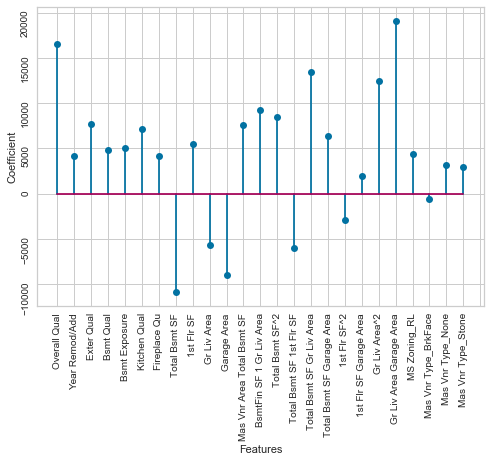

In [57]:
# Visualizing coefficients

xticklabels = ['Overall Qual', 'Year Remod/Add', 'Exter Qual', 'Bsmt Qual',
       'Bsmt Exposure', 'Kitchen Qual', 'Fireplace Qu', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Garage Area',
       'Mas Vnr Area Total Bsmt SF', 'BsmtFin SF 1 Gr Liv Area',
       'Total Bsmt SF^2', 'Total Bsmt SF 1st Flr SF',
       'Total Bsmt SF Gr Liv Area', 'Total Bsmt SF Garage Area',
       '1st Flr SF^2', '1st Flr SF Garage Area', 'Gr Liv Area^2',
       'Gr Liv Area Garage Area', 'MS Zoning_RL', 'Mas Vnr Type_BrkFace',
       'Mas Vnr Type_None', 'Mas Vnr Type_Stone']

plt.figure(figsize=(12,8))

f, ax = plt.subplots()

ax.stem(ridge_eval.coef_)
ax.set_xticklabels(xticklabels)
ax.set_xticks(np.arange(0,26,1))
ax.tick_params(rotation=90)
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient');

#f.savefig('../images/Coefficient.jpg')

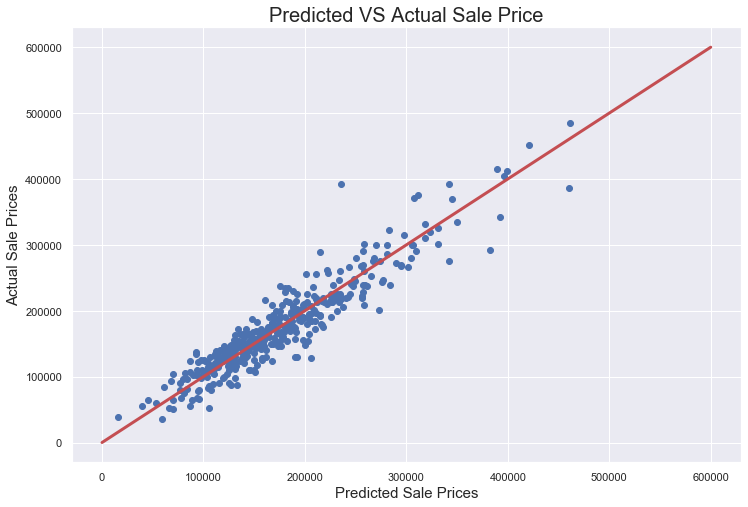

In [51]:
# Visualizing our Predictions vs Actual Sale Price

plt.figure(figsize=(12,8))

plt.scatter(pred,y_test)
plt.plot((0,600000), (0, 600000), c='r', linewidth=3)
plt.xlabel('Predicted Sale Prices', fontsize=15)
plt.ylabel('Actual Sale Prices', fontsize=15)
plt.title('Predicted VS Actual Sale Price', fontsize=20);

plt.savefig('../images/Predicted-VS-Actual-Sale-Price.jpg')

In [52]:
from yellowbrick.regressor import ResidualsPlot

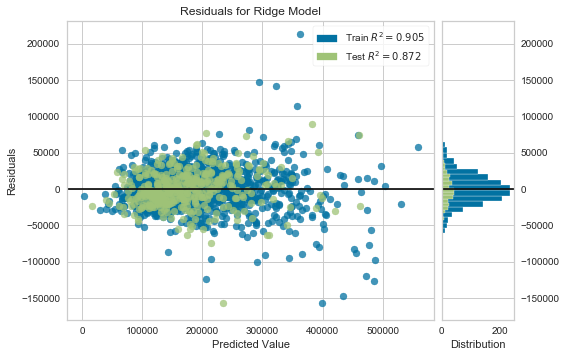

In [53]:
# Visualizing distribution of errors

model = Ridge(alpha=ridge_optimal_alpha)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# visualizer.show(outpath="../images/Residual-Plot.jpg");

From the graphs above, it seems that normality of residual errors assumption is not violated.

However, we do see that the  of the residual errors are not homoscadastic (not so evident from the prediction vs actual plot, but seemingly more evident from the residual plot). The variance of the errors seem to increase for higher Sale Prices.

Perhaps a higher level model like Neural Networks & Random Forests would be able to handle the change in variance at the higher Sale Prices better. Or maybe even more complex features _(i.e. polynomial features to higher powers)_

The regression model seem to be decent but I believe not to be the best possible.

## Exporting results using best model for Kaggle submission

In [54]:
kaggle_submission = ridge_opt_model.predict(X_kaggle_test_extracted_scaled) # Extracting predictions
kaggle_submission_df = pd.DataFrame(kaggle_submission,columns=['SalePrice']) # Setting as dataframe with column name SalePrice
kaggle_submission_df['Id'] = kaggle_test.index # Creating Id column
kaggle_submission_df.set_index('Id', inplace=True) # Setting Id as index
kaggle_submission_df.head()

,SalePrice
Id,
2658,127372.677436
2718,176639.704038
2414,201075.651828
1989,123198.012039
625,162110.817836


In [55]:
kaggle_submission_df.describe()

,SalePrice
count,879.000000
mean,173509.069722
std,79219.270887
min,40019.538698
25%,119142.275698
50%,154141.136364
75%,208547.178664
max,850473.420129


In [56]:
# Exporting for submission

kaggle_submission_df.to_csv('../datasets/kaggle_submission.csv')